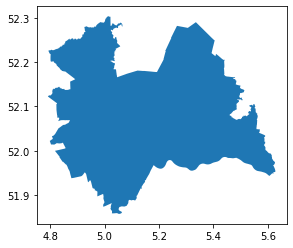

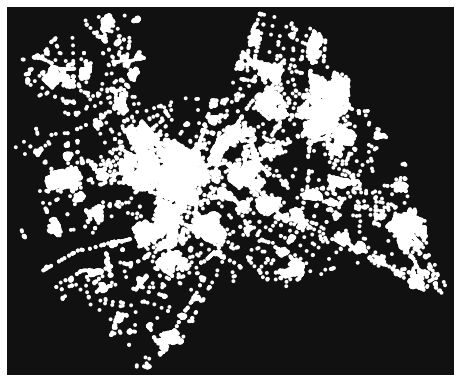

In [2]:

import osmnx as ox


import matplotlib.pyplot as plt

import networkx as nx

import pandas as pd

import numpy as np

import matplotlib.cm as cm

import csv


from shapely import geometry


query = {'state': 'Utrecht'}

# get the boundaries of the place
utrecht_boundary = ox.geocode_to_gdf(query)
utrecht_boundary.plot()

# or just get the street network within the place
G = ox.graph_from_place(query, network_type='drive')
fig, ax = ox.plot_graph(G, edge_linewidth=0)

In [3]:
# nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)


# xmax = nodes.x.max()
# xmin = nodes.x.min()
# ymin = nodes.y.min()
# ymax = nodes.y.max()

xmin, ymin, xmax, ymax = utrecht_boundary.geometry[0].bounds

print(xmin, ymin, xmax, ymax )

4.7920404 51.8573607 5.6273145 52.3036184


## Lees data per plaats

In [4]:

postcodes = pd.read_excel('data/Consumenten_data/Postcodes Provincie Utrecht.xlsx') 
plaats = postcodes['Plaats'].unique()
postcodes.head()

,Postcode,Gemeente,Plaats,Aantal inwoners?
0,1390,De Ronde Venen,Abcoude,NaN
1,1391,De Ronde Venen,Abcoude,NaN
2,1393,Stichtse Vecht,Nigtevecht,NaN
3,1396,De Ronde Venen,Baambrugge,NaN
4,1426,De Ronde Venen,de Hoef,NaN


In [5]:
area = utrecht_boundary.geometry.to_crs({'proj':'cea'}).area[0]/10**6
print('De provincie Utrecht beslaat {:.4f} km^2.'.format(area))

De provincie Utrecht beslaat 1560.3236 km^2.


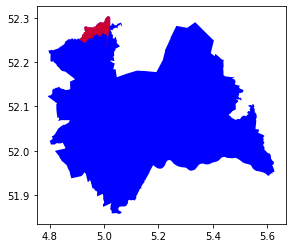

Abcoude area: 22.74 square km


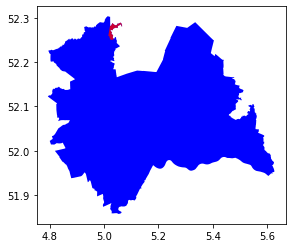

Nigtevecht area: 4.58 square km


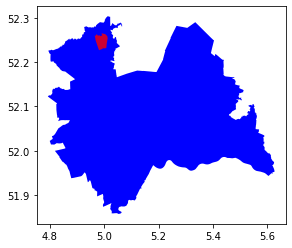

Baambrugge area: 9.41 square km


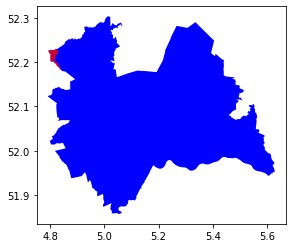

de Hoef area: 5.68 square km


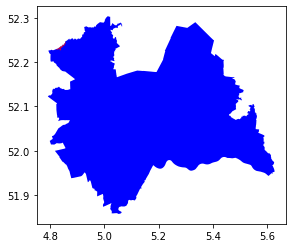

Amstelhoek area: 0.95 square km


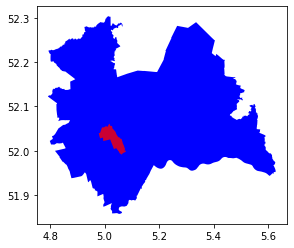

IJsselstein area: 21.68 square km


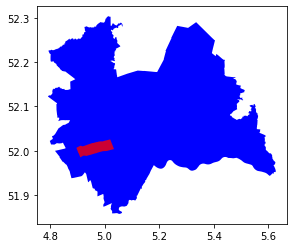

Benschop area: 22.82 square km


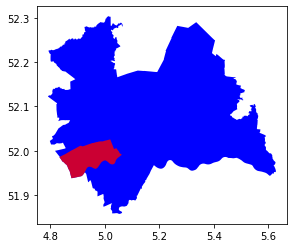

Lopik area: 79.00 square km


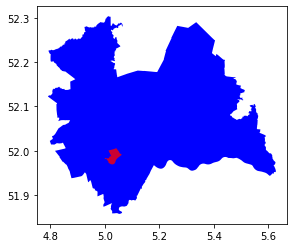

Lopikerkapel area: 8.41 square km


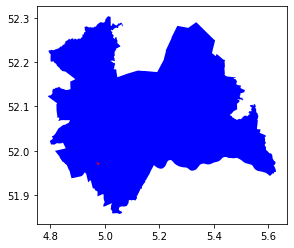

Jaarsveld area: 0.35 square km


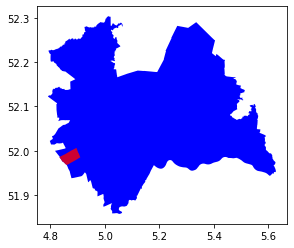

Polsbroek area: 11.71 square km


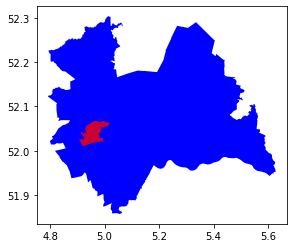

Montfoort area: 25.29 square km


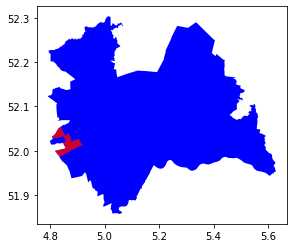

Oudewater area: 19.96 square km


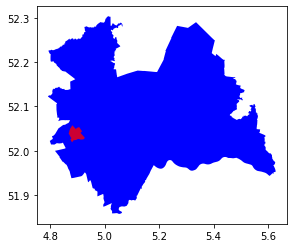

Snelrewaard area: 9.72 square km


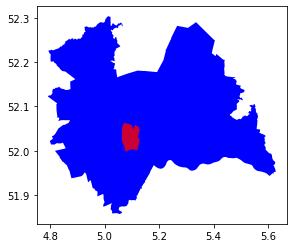

Nieuwegein area: 25.65 square km


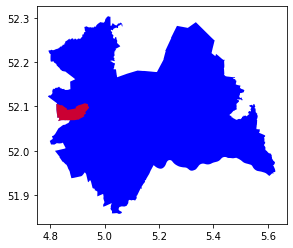

Woerden area: 24.49 square km


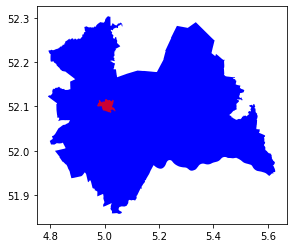

Vleuten area: 8.95 square km


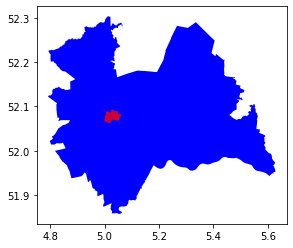

De Meern area: 9.04 square km


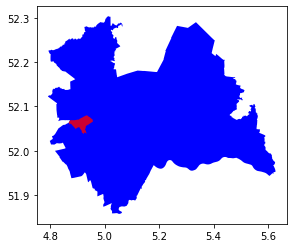

Linschoten area: 12.92 square km


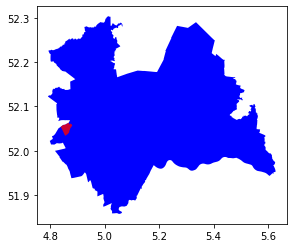

Papekop area: 5.08 square km


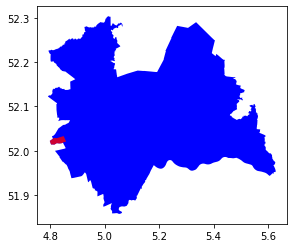

Hekendorp area: 5.34 square km


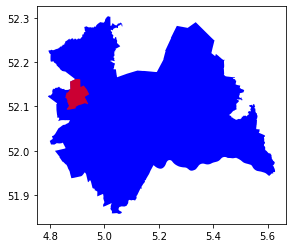

Kamerik area: 28.68 square km


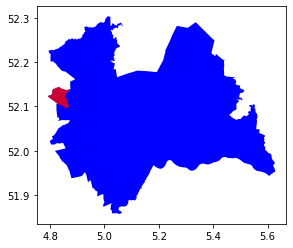

Zegveld area: 16.01 square km


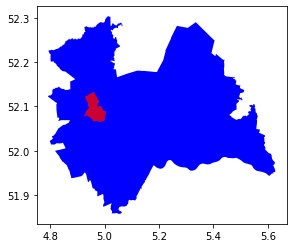

Harmelen area: 23.77 square km


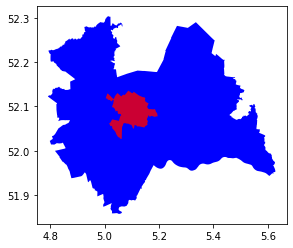

Utrecht area: 75.03 square km


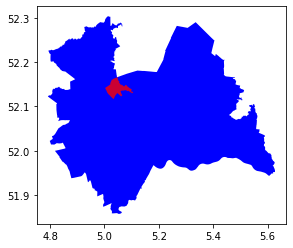

Maarssen area: 16.12 square km


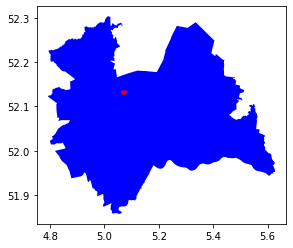

Oud Zuilen area: 1.45 square km


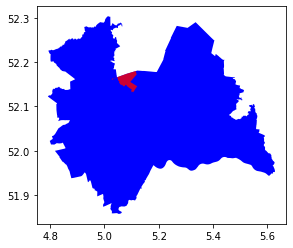

Tienhoven area: 13.36 square km


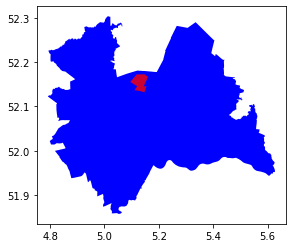

Westbroek area: 12.38 square km


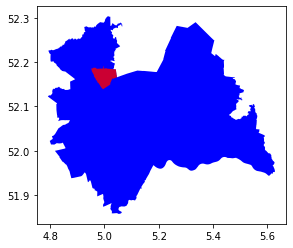

Breukelen area: 21.47 square km


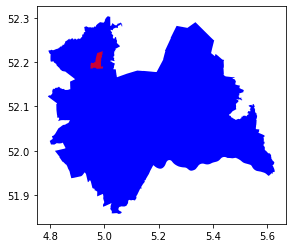

Nieuwer Ter Aa area: 7.67 square km


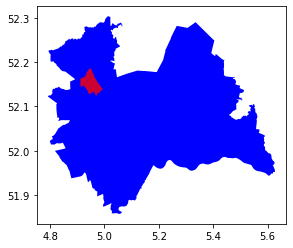

Kockengen area: 19.48 square km


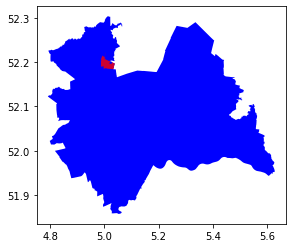

Nieuwersluis area: 6.78 square km


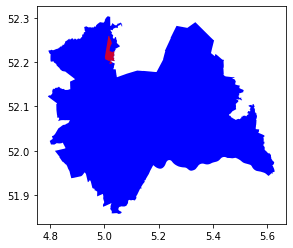

Loenen aan de Vecht area: 8.64 square km


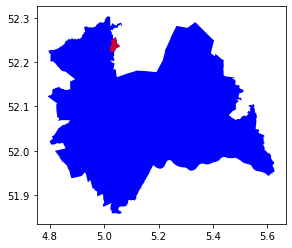

Vreeland area: 5.15 square km


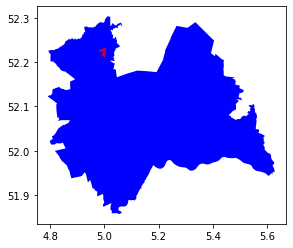

Loenersloot area: 2.14 square km


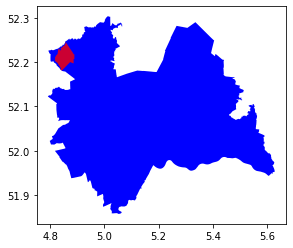

Mijdrecht area: 19.33 square km


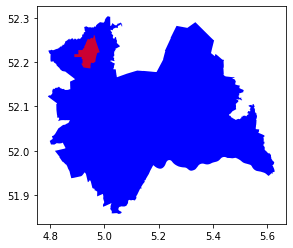

Vinkeveen area: 25.59 square km


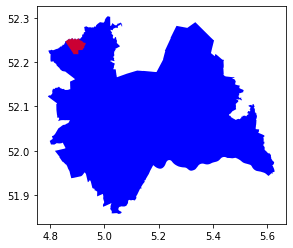

Waverveen area: 12.37 square km


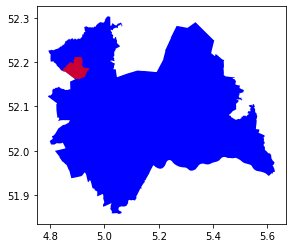

Wilnis area: 20.93 square km


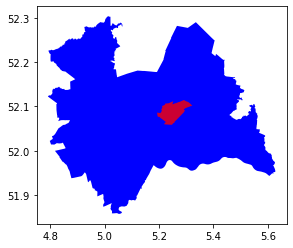

Zeist area: 28.76 square km


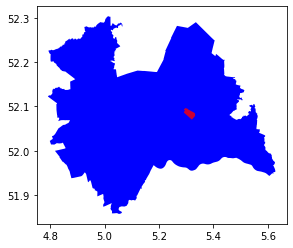

Austerlitz area: 4.36 square km


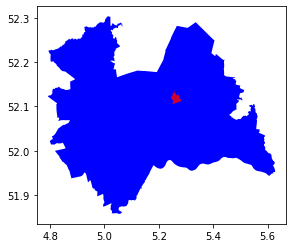

Huis ter Heide area: 4.47 square km


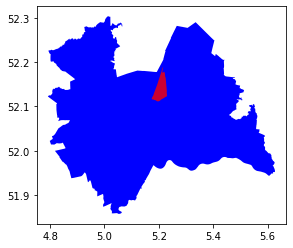

Bilthoven area: 16.72 square km


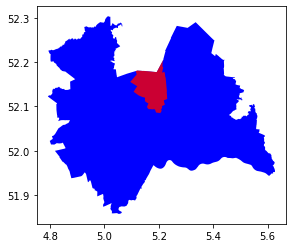

De Bilt area: 67.14 square km


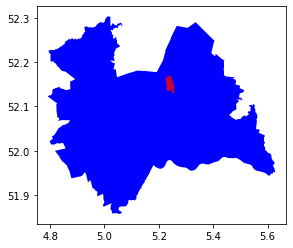

Den Dolder area: 6.51 square km


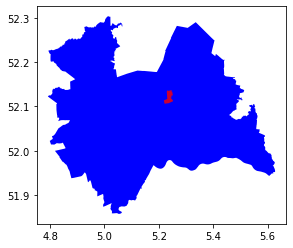

Bosch en Duin area: 4.58 square km


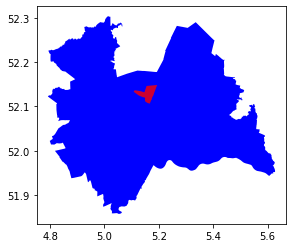

Groenekan area: 12.14 square km


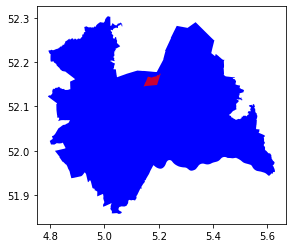

Maartensdijk area: 7.25 square km


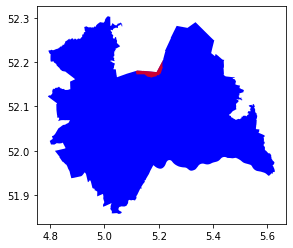

Hollandsche Rading area: 8.33 square km


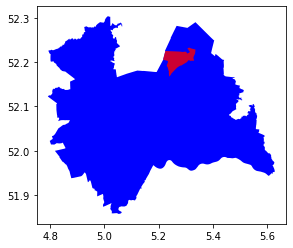

Baarn area: 27.86 square km


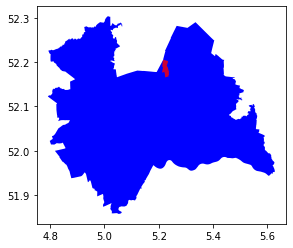

Lage Vuursche area: 5.15 square km


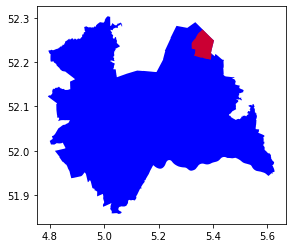

Bunschoten-Spakenburg area: 28.05 square km


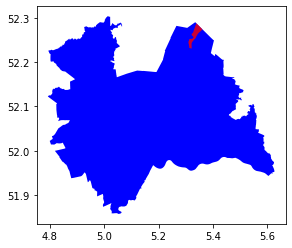

Eemdijk area: 6.77 square km


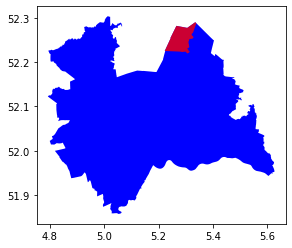

Eemnes area: 33.71 square km


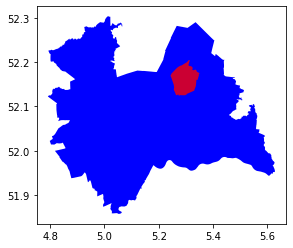

Soest area: 40.83 square km


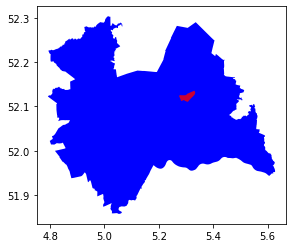

Soesterberg area: 5.61 square km


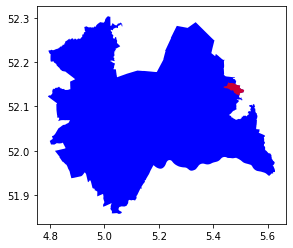

Achterveld area: 7.77 square km


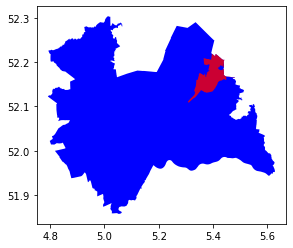

Amersfoort area: 44.77 square km


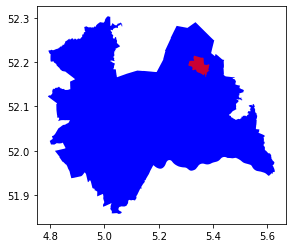

Hoogland area: 14.79 square km


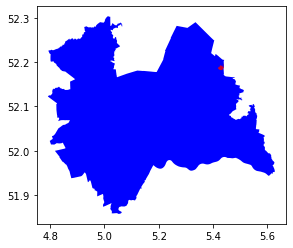

Hooglanderveen area: 1.20 square km


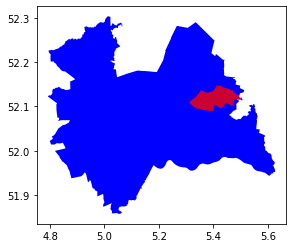

Leusden area: 47.49 square km


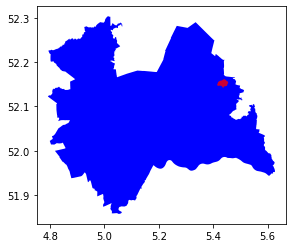

Stoutenburg area: 3.65 square km


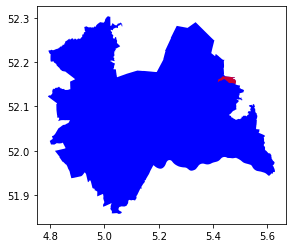

Stoutenburg Noord area: 4.73 square km


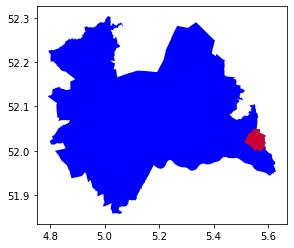

Veenendaal area: 19.73 square km


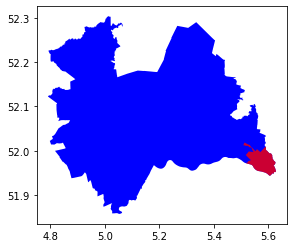

Rhenen area: 33.63 square km


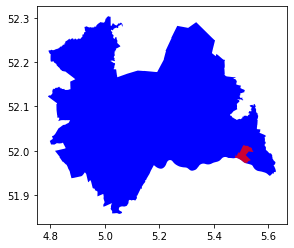

Elst Ut area: 10.14 square km


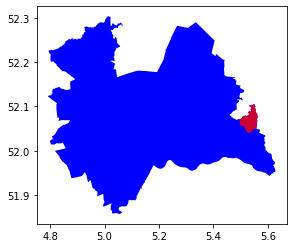

Renswoude area: 18.51 square km


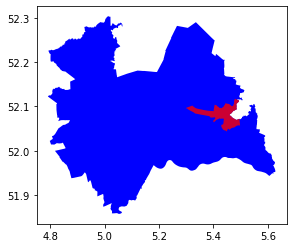

Woudenberg area: 36.81 square km


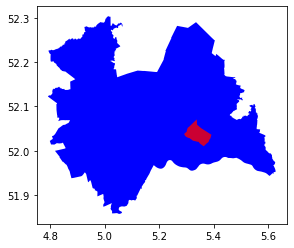

Doorn area: 22.23 square km


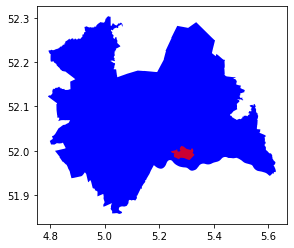

Cothen area: 11.93 square km


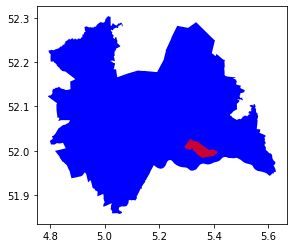

Langbroek area: 17.90 square km


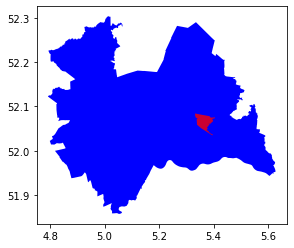

Maarn area: 12.50 square km


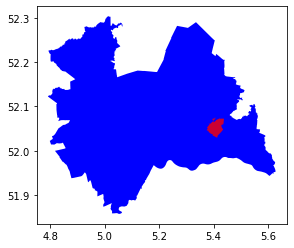

Maarsbergen area: 12.85 square km


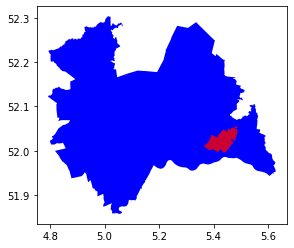

Leersum area: 29.85 square km


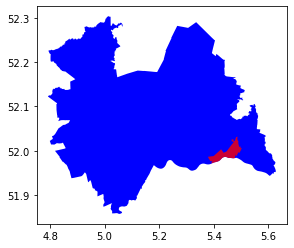

Amerongen area: 18.87 square km


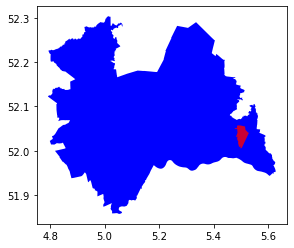

Overberg area: 11.22 square km


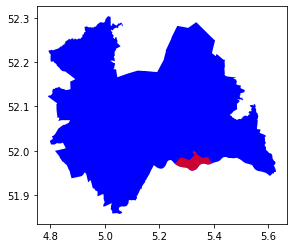

Wijk bij Duurstede area: 20.58 square km


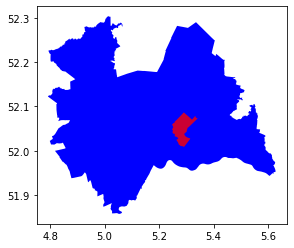

Driebergen-Rijsenburg area: 26.45 square km


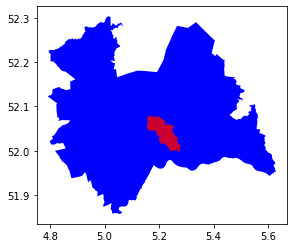

Bunnik area: 37.58 square km


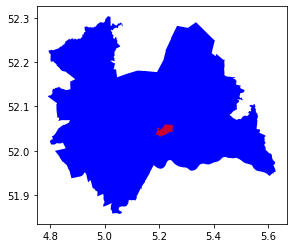

Odijk area: 8.00 square km


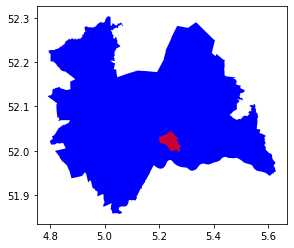

Werkhoven area: 15.99 square km


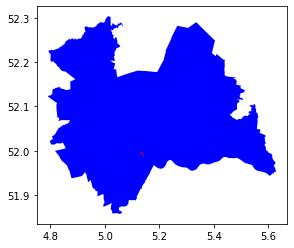

Ossenwaard area: 0.40 square km


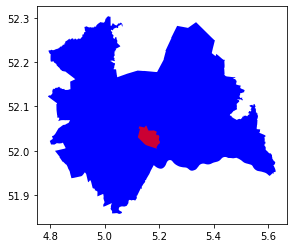

Houten area: 19.82 square km


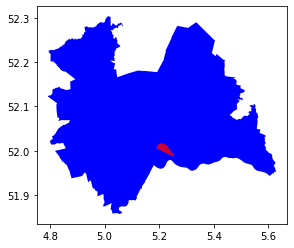

't Goy area: 6.63 square km


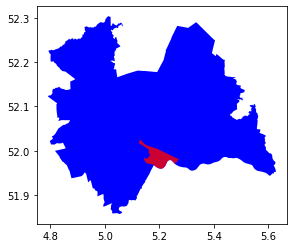

Schalkwijk area: 26.31 square km


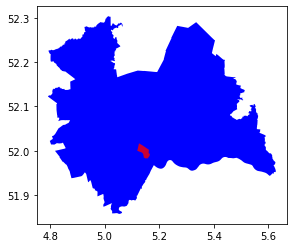

Tull en 't Waal area: 6.24 square km


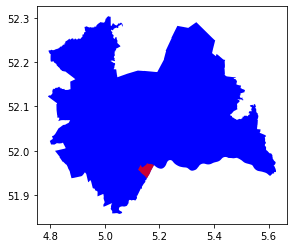

Everdingen area: 7.71 square km


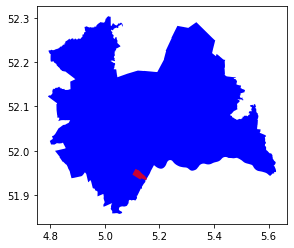

Zijderveld area: 4.95 square km


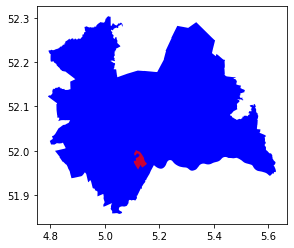

Hagestein area: 8.06 square km


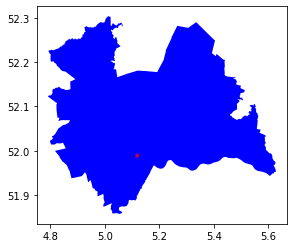

Hoef en Haag area: 0.76 square km


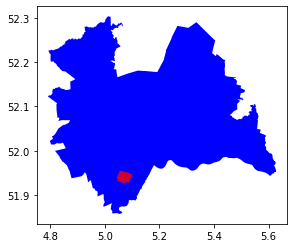

Hei- en Boeicop area: 8.67 square km


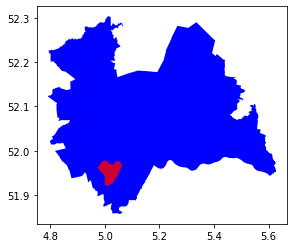

Lexmond area: 22.91 square km


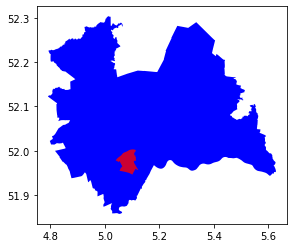

Vianen area: 20.52 square km


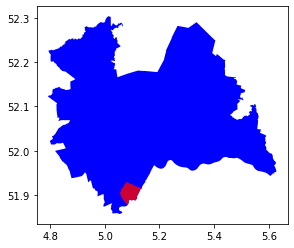

Leerdam area: 17.56 square km


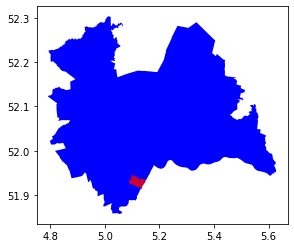

Schoonrewoerd area: 7.79 square km


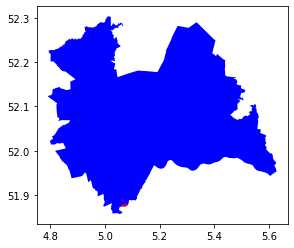

Oosterwijk area: 1.20 square km


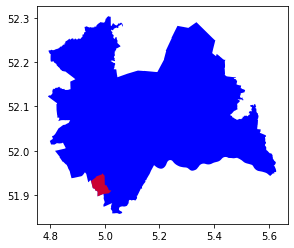

Meerkerk area: 15.22 square km


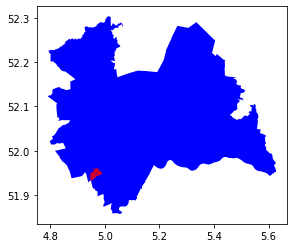

Ameide area: 5.24 square km


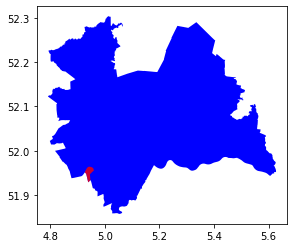

Tienhoven aan de Lek area: 4.35 square km


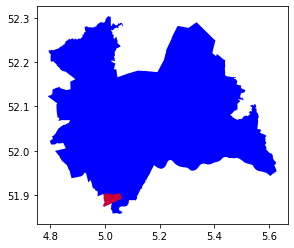

Nieuwland area: 9.85 square km


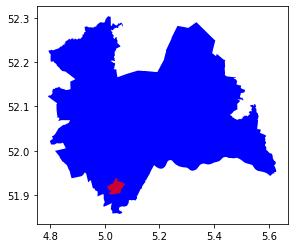

Leerbroek area: 10.26 square km


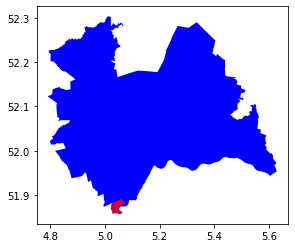

Kedichem area: 7.88 square km


In [6]:
gemeente_boundaries = {}
# fig,ax = plt.subplots()
# utrecht_boundary.plot(ax=ax,color='b')
for gemeente in plaats:
    query= gemeente+",Utrecht, The Netherlands"
    gdf = ox.geocode_to_gdf( query)
    fig,ax = plt.subplots()
    utrecht_boundary.plot(ax=ax,color='b')
    gdf.plot(ax=ax,color='r',alpha=0.8)
    plt.show()
    gemeente_boundaries[gemeente] = gdf
    gdf = gdf['geometry'].to_crs({'proj':'cea'}) 
    print(gemeente+' area: {:.2f} square km'.format(gdf.area[0]/10**6))




In [7]:
import os
import time
import glob

cwd = os.getcwd()
caches = ['/data/cache/footprints_building/Utrecht_{}.pickle','/data/cache/footprints_landuse/Utrecht_{}.pickle','/data/cache/graph_raw/Utrecht.pickle']
# nx.write_gpickle(G,cwd+caches[2])
buildings = pd.DataFrame()
footpr = pd.DataFrame()
for gemeente in plaats:
    print(gemeente)
    pickleFilenamesList = glob.glob(cwd+caches[0].format(gemeente+'*'))
    st = time.time()
    for file in pickleFilenamesList:
        buildings=buildings.append(pd.read_pickle(file))
    print('for {} it took {:.2f} seconds to read buildings'.format(gemeente,time.time()-st))
    pickleFilenamesList = glob.glob(cwd+caches[1].format(gemeente+'*'))
    st = time.time()
    for file in pickleFilenamesList:
        footpr=footpr.append(pd.read_pickle(file))
    print('for {} it took {:.2f} seconds to read landuse'.format(gemeente,time.time()-st))
    
    

Abcoude
for Abcoude it took 0.04 seconds to read buildings
for Abcoude it took 0.01 seconds to read landuse
Nigtevecht
for Nigtevecht it took 0.02 seconds to read buildings
for Nigtevecht it took 0.01 seconds to read landuse
Baambrugge
for Baambrugge it took 0.02 seconds to read buildings
for Baambrugge it took 0.01 seconds to read landuse
de Hoef
for de Hoef it took 0.02 seconds to read buildings
for de Hoef it took 0.01 seconds to read landuse
Amstelhoek
for Amstelhoek it took 0.02 seconds to read buildings
for Amstelhoek it took 0.01 seconds to read landuse
IJsselstein
for IJsselstein it took 0.10 seconds to read buildings
for IJsselstein it took 0.02 seconds to read landuse
Benschop
for Benschop it took 0.04 seconds to read buildings
for Benschop it took 0.02 seconds to read landuse
Lopik
for Lopik it took 0.12 seconds to read buildings
for Lopik it took 0.06 seconds to read landuse
Lopikerkapel
for Lopikerkapel it took 0.05 seconds to read buildings
for Lopikerkapel it took 0.02 s

for Langbroek it took 1.64 seconds to read buildings
for Langbroek it took 0.04 seconds to read landuse
Maarn
for Maarn it took 1.83 seconds to read buildings
for Maarn it took 0.03 seconds to read landuse
Maarsbergen
for Maarsbergen it took 1.70 seconds to read buildings
for Maarsbergen it took 0.03 seconds to read landuse
Leersum
for Leersum it took 3.56 seconds to read buildings
for Leersum it took 0.08 seconds to read landuse
Amerongen
for Amerongen it took 1.77 seconds to read buildings
for Amerongen it took 0.03 seconds to read landuse
Overberg
for Overberg it took 1.64 seconds to read buildings
for Overberg it took 0.04 seconds to read landuse
Wijk bij Duurstede
for Wijk bij Duurstede it took 2.29 seconds to read buildings
for Wijk bij Duurstede it took 0.04 seconds to read landuse
Driebergen-Rijsenburg
for Driebergen-Rijsenburg it took 3.82 seconds to read buildings
for Driebergen-Rijsenburg it took 0.08 seconds to read landuse
Bunnik
for Bunnik it took 4.68 seconds to read bui

In [8]:


vcount = list(footpr.landuse.value_counts()[:25].index)
colors = {'village_green':'lightgreen','static_caravan':'yellow','water':'aqua',
            'road':'lightblue','mobile_home':'gray','building':'saddlebrown',
            'grass':'g','forest':'forestgreen','meadow':'lightgreen',
            'park':'palegreen','recreation_ground':'gold','commercial':'pink',
            'residential':'khaki','railway':'gray','retail':'fuchsia',
            'orchard':'darkgreen','allotments':'lightgray','industrial':'darkgray',
            'cemetery':'dimgray','farmland':'wheat','farmyard':'goldenrod',
            'paved':'rosybrown','construction':'indianred','reservoir':'lightblue',
            'depot':'gray','traffic_island':'brown','religious':'tan',
            'basin':'aqua','corral':'brown','greenhouse':'white','greenhouse_horticulture':'white'}

colormap = {}
for landuse in vcount:
    if landuse not in colors.keys():
        colormap[landuse] = 'indigo'
    else:
        colormap[landuse] = colors[landuse]
    

In [9]:
def plot_map(G,footpr,water,building,nodes,edges,vcount,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax):
    fig,ax=plt.subplots(figsize=(12,12))
    if len(footpr)>0:
        for i in range(0,len(vcount)):
            sub_footpr = footpr[footpr.landuse==vcount[i]]
            sub_footpr.plot(ax=ax,facecolor=colormap[vcount[i]], alpha=0.7,label=vcount[i])

    edges.plot(ax=ax,alpha=0.5,edgecolor='royalblue')
     
    if len(water)>0:
        water[water.natural=='water'].plot(ax=ax,edgecolor='aqua',facecolor='aqua', alpha=0.5)
    if len(building)>0:
        building.plot(ax=ax,facecolor='saddlebrown',alpha=1)

    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colormap.values()]
    plt.legend(markers, colormap.keys(), loc=(1.04,0),numpoints=1)
    plt.show()
    

    
plot_map(G,footpr,[],buildings,nodes,edges,vcount)



NameError: name 'nodes' is not defined

In [5]:
folder = 'data/data_overheid_wms/postcode_stats'

import geopandas as gpd

gdf = gpd.read_file(folder+"/postcode_stats.geojson")
gdf.crs = 'EPSG:28992'



In [6]:
print(list(gdf.columns))
gdf.head()
gdf.index = gdf['index']
gdf = gdf.to_crs('EPSG:4326')

['index', 'Postcode', 'INWONER', 'MAN', 'VROUW', 'INW_014', 'INW_1524', 'INW_2544', 'INW_4564', 'INW_65PL', 'GEBOORTE', 'P_NL_ACHTG', 'P_WE_MIG_A', 'P_NW_MIG_A', 'AANTAL_HH', 'TOTHH_EENP', 'TOTHH_MPZK', 'HH_EENOUD', 'HH_TWEEOUD', 'GEM_HH_GR', 'WONING', 'WONVOOR45', 'WON_4564', 'WON_6574', 'WON_7584', 'WON_8594', 'WON_9504', 'WON_0514', 'WON_1524', 'WON_MRGEZ', 'P_HUURWON', 'P_KOOPWON', 'WON_HCORP', 'WON_NBEW', 'WOZWONING', 'G_GAS_WON', 'G_ELEK_WON', 'M_INKHH', 'UITKMINAOW', 'AFS_SUPERM', 'AV1_SUPERM', 'AV3_SUPERM', 'AV5_SUPERM', 'AFS_DAGLMD', 'AV1_DAGLMD', 'AV3_DAGLMD', 'AV5_DAGLMD', 'AFS_WARENH', 'AV5_WARENH', 'AV10WARENH', 'AV20WARENH', 'AFS_CAFE', 'AV1_CAFE', 'AV3_CAFE', 'AV5_CAFE', 'AFS_CAFTAR', 'AV1_CAFTAR', 'AV3_CAFTAR', 'AV5_CAFTAR', 'AFS_HOTEL', 'AV5_HOTEL', 'AV10_HOTEL', 'AV20_HOTEL', 'AFS_RESTAU', 'AV1_RESTAU', 'AV3_RESTAU', 'AV5_RESTAU', 'AFS_BSO', 'AV1_BSO', 'AV3_BSO', 'AV5_BSO', 'AFS_KDV', 'AV1_KDV', 'AV3_KDV', 'AV5_KDV', 'AFS_BRANDW', 'AFS_OPRIT', 'AFS_TRNOVS', 'AFS_TREIN

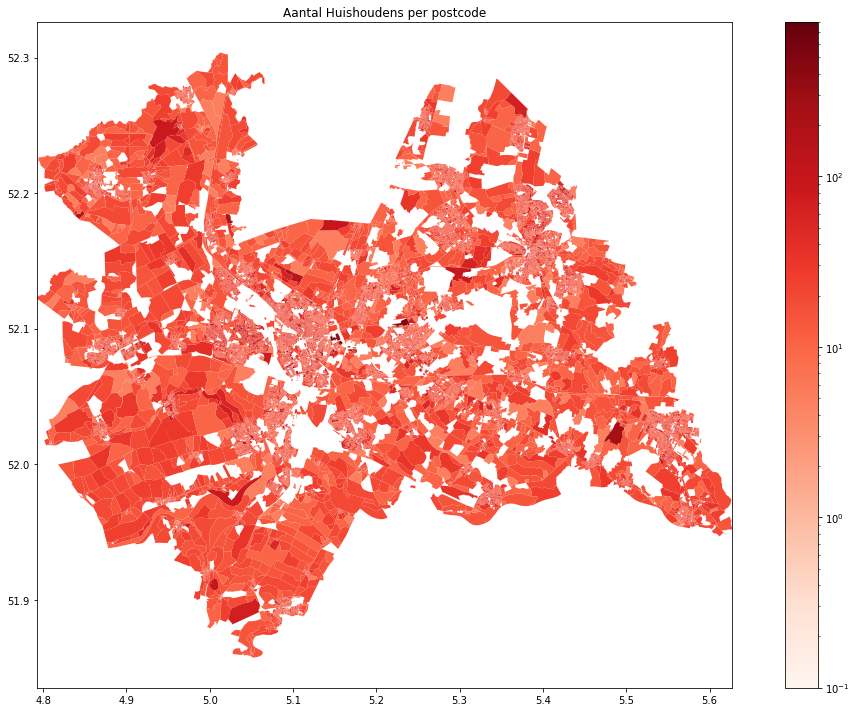

In [65]:
import matplotlib
gdf['AANTAL_HH'].replace('-99997',0,inplace=True)
gdf['AANTAL_HH']=gdf['AANTAL_HH'].apply(lambda x: int(x) if type(x) == str else x)
f,ax=plt.subplots(figsize=(15,10))
gdf.plot(ax=ax,column='AANTAL_HH', cmap='Reds', legend=True,norm=matplotlib.colors.LogNorm(vmin=0.1, vmax=800))
ax.set_xlim((xmin,xmax))
plt.title('Aantal Huishoudens per postcode')
plt.tight_layout()
plt.savefig('Huishoudens.png')

In [45]:
gdf['AANTAL_HH']=gdf['AANTAL_HH'].apply(lambda x: int(x) if type(x) == str else x)


581560

In [13]:
def get_numbers(df_col):
    df_col.replace('-99997',0,inplace=True)
    df_col = df_col.apply(lambda x: int(x) if type(x) == str else x)
    df_col[df_col<0]=0
    return df_col

cols = ['INWONER','MAN', 'VROUW','INW_014', 'INW_1524', 'INW_2544', 'INW_4564', 'INW_65PL', 'TOTHH_EENP', 'TOTHH_MPZK', 'HH_EENOUD', 'HH_TWEEOUD','GEM_HH_GR', 'AANTAL_HH']

for col in cols:
    print(col)
    gdf[col] = get_numbers(gdf[col])
    print(gdf[col].sum())

INWONER
1307605
MAN
638505
VROUW
662775
INW_014
208395
INW_1524
131690
INW_2544
328345
INW_4564
337485
INW_65PL
182755
TOTHH_EENP
194630
TOTHH_MPZK
115775
HH_EENOUD
8610
HH_TWEEOUD
129240
GEM_HH_GR
65596.59999999999
AANTAL_HH
581560


In [52]:
non_zero = gdf['GEM_HH_GR'][gdf['GEM_HH_GR']>0]

In [54]:
non_zero.mean()

2.282494171683078

In [9]:
(581560-194630)

386930

In [12]:
1112975/386930

2.8764246762980386

In [14]:
pop_cols = ['INWONER','MAN', 'VROUW','INW_014', 'INW_1524', 'INW_2544', 'INW_4564', 'INW_65PL']
df_sum = pd.DataFrame()
for col in cols:
    print(col)
    df_sum[col] = gdf[col].sum()

NameError: name 'pd' is not defined